## KAGGLE LIKE CHALLENGE

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

### READING FILE WITH LABELS

In [12]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [13]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# EXPLORING DATASET

## GENERAL INFOS AND STATISTICS

In [14]:
data.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


## VISUALIZATION

### 1. Age

<AxesSubplot:xlabel='converted', ylabel='age'>

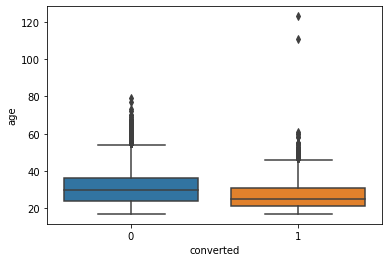

In [16]:
sns.boxplot(x="converted", y="age", data=data)

In [17]:
# Removing age outlierrs
data = data.loc[data["age"] < 100]

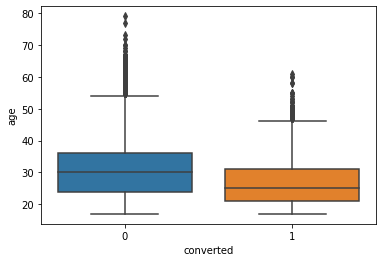

In [18]:
sns.boxplot(x="converted", y="age", data=data)
plt.show()

### 2. Country

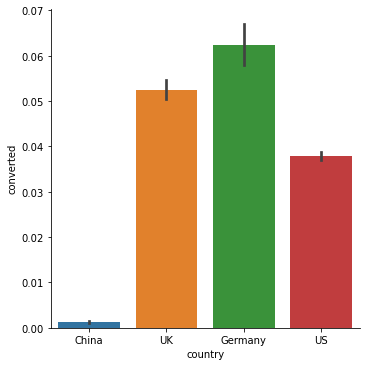

In [6]:
sns.catplot(x = "country", y = "converted", data = data, kind = 'bar')

### 3. Source

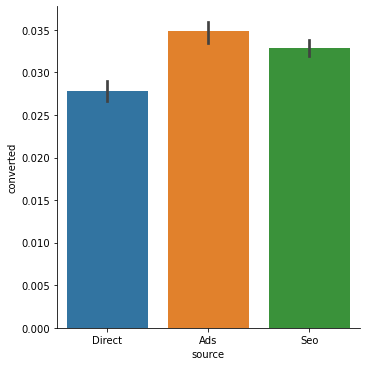

In [8]:
sns.catplot(x = "source", y = "converted", data = data, kind = 'bar')

### 4. Type of User

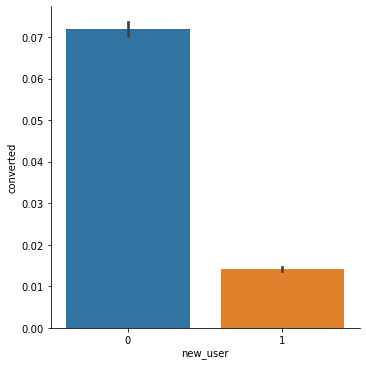

In [9]:
sns.catplot(x = "new_user", y = "converted", data = data, kind = 'bar')

# BUILDING THE MODEL

In [19]:
# Choosing relevant variables
features_list = ['country', 'source', 'age', 'new_user', 'total_pages_visited']
numeric_indices = [2,3,4]
categorical_indices = [0,1]
target_variable = 'converted'

In [20]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'source', 'age', 'new_user', 'total_pages_visited'], dtype='object')



In [21]:
# One hot encoding for categorical variables
X = pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,22,1,2,1,0,0,0,0,1,0
1,21,1,3,0,0,1,0,1,0,0
2,20,0,14,0,1,0,0,0,0,1
3,23,1,3,0,0,0,1,0,0,1
4,28,1,3,0,0,0,1,0,1,0


In [22]:
# Dividing dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [23]:
# Converting pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[24  1  1  0  0  0  1  0  0  1]
 [22  1  6  1  0  0  0  0  0  1]
 [34  1  4  1  0  0  0  0  1  0]
 [23  1  8  1  0  0  0  0  0  1]
 [26  1  1  0  0  0  1  0  0  1]]
[[43  1  3  0  0  0  1  0  0  1]
 [37  1 13  0  0  0  1  0  0  1]]

[0 0 0 0 0]
[0 0]


In [15]:
# Puting here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.7944704   0.67762355 -1.16003652 -0.56565718 -0.20707628 -0.42440404
   0.87950244 -0.62562329 -0.54474257  1.02048942]
 [-1.03651356  0.67762355  0.33666114  1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329 -0.54474257  1.02048942]
 [ 0.41574542  0.67762355 -0.26201793  1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329  1.83572949 -0.97992197]
 [-0.91549198  0.67762355  0.9353402   1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329 -0.54474257  1.02048942]
 [-0.55242723  0.67762355 -1.16003652 -0.56565718 -0.20707628 -0.42440404
   0.87950244 -0.62562329 -0.54474257  1.02048942]]


## MODEL: LOGISTIC REGRESSION

In [16]:
# Training model
print("Train model...")

Cs = [10**i for i in range(-4,4)]
cv = 5

classifier = LogisticRegressionCV(Cs=Cs, cv=cv, scoring="f1", refit=True) #regularized logit with regularization strength chosen by cross-val
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [17]:
# Predicting on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 1 0 1]



### TEST PIPELINE

In [18]:
# Transforming test set

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 1.50493967  0.67762355 -0.56135746 -0.56565718 -0.20707628 -0.42440404
   0.87950244 -0.62562329 -0.54474257  1.02048942]
 [ 0.77881017  0.67762355  2.43203785 -0.56565718 -0.20707628 -0.42440404
   0.87950244 -0.62562329 -0.54474257  1.02048942]
 [ 1.14187492  0.67762355 -0.86069699  1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329 -0.54474257  1.02048942]
 [-0.7944704  -1.47574564  0.9353402   1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329  1.83572949 -0.97992197]
 [ 0.89983175  0.67762355  0.0373216  -0.56565718 -0.20707628  2.35624526
  -1.13700651 -0.62562329  1.83572949 -0.97992197]]


In [19]:
# Predicting on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



### PERFORMANCE ASSESSMENT

In [20]:
# The f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7617767623143605
f1-score on test set :  0.783068783068783


In [21]:
# Computing other performance metrics to better understand what the model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246907    967]
 [  2578   5668]]

Confusion matrix on test set : 
[[27423   103]
 [  266   666]]



## TRAINING BEST CLASSIFIER ON ALL DATA & PREDICTING ON  'X_without_labels'

In [22]:
# Concatenating the train and test set to train the best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5,
                     scoring='f1')

In [23]:
# Reading data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

X_without_labels = data_without_labels.loc[:, features_list]

X_without_labels = pd.get_dummies(X_without_labels)

# Converting pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[28  0 16  0  0  1  0  0  0  1]
 [22  1  5  0  0  1  0  0  1  0]
 [32  1  1  1  0  0  0  0  0  1]
 [32  1  6  0  0  0  1  1  0  0]
 [25  0  3  1  0  0  0  0  0  1]]


In [24]:
# Processing (same processing as for the test set)
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31038407 -1.47574564  3.33005645 -0.56565718 -0.20707628  2.35624526
  -1.13700651 -0.62562329 -0.54474257  1.02048942]
 [-1.03651356  0.67762355  0.0373216  -0.56565718 -0.20707628  2.35624526
  -1.13700651 -0.62562329  1.83572949 -0.97992197]
 [ 0.17370226  0.67762355 -1.16003652  1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329 -0.54474257  1.02048942]
 [ 0.17370226  0.67762355  0.33666114 -0.56565718 -0.20707628 -0.42440404
   0.87950244  1.59840598 -0.54474257 -0.97992197]
 [-0.67344882 -1.47574564 -0.56135746  1.76785522 -0.20707628 -0.42440404
  -1.13700651 -0.62562329 -0.54474257  1.02048942]]


In [25]:
# Making predictions and dumping to file
data = {'converted': classifier.predict(X_without_labels)}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_Logistic_Regression.csv', index=False)
